# Introduction

It is essential to identify and track the loacation of invasive species because these species are one of the most significant threat to biodiversity, and are harmful to the environment, the economy, and even human health. 

In order to protect our native and domesticated plants and animals from invasive species, identification and monitor are esstials. Currently, ecosystem and plant distribution monitoring depends on expert knowledge. Trained scientists visit designated areas and take note of the species inhabiting them. Using such a highly qualified workforce is expensive, time inefficient, and insufficient since humans cannot cover large areas when sampling.

Hence people wondered if there are some machine learning algorithms that can be used to identify the invasive species without human intervention in those areas where humans cannot cover for sampling, and this is the purpose of this project.

The data set contains pictures from a a Brazilian national forest which is downloaded from the kaggle competition "_Invasive Species Monitoring: Identify images of invasive hydrangea_". Some of the pictures contain Hydrangea, one of invasisve species from Asia. Our goal is to be able to identify and predict the presence of Hydrangea.

___Keywords:___ CNN, VGG, invasive species

In [13]:
import numpy as np
import pandas as pd
import cv2
import cPickle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load the data

Let's load the labels via pandas and load images via opencv.

#### Load the labels

In [3]:
master = pd.read_csv("./train_labels.csv", engine='c')
master.head()

In [93]:
# shape of the labels csv
master.shape

(2295, 2)

#### load the training images

In [94]:
img_path = "./train/"
file_paths = [img_path + str(master.ix[i, 'name']) + '.jpg' for i in xrange(len(master))]
y = np.array(master['invasive'])

In [95]:
%%time
#image reseize & centering & crop 

# def centering_image(img):
#     size = (256,256)
    
#     img_size = img.shape[:2]
    
#     # centering
#     row = (size[0] - img_size[0]) // 2
#     col = (size[1] - img_size[1]) // 2
#     resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
#     resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img

#     return resized

x = []
for file_path in file_paths:
    # read image
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    
#     # resize and keep the original shape of the image
#     if(img.shape[0] > img.shape[1]): # long height, short width
#         tile_size = (int(img.shape[1]*256/img.shape[0]),256) # cv2.resize takes (col, row)
#     else:  # long width, short height
#         tile_size = (256, int(img.shape[0]*256/img.shape[1]))
        
#     # centering
#     img = centering_image(cv2.resize(img, dsize=tile_size, interpolation=cv2.INTER_LANCZOS4))
    img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_LANCZOS4)
#     # crop 
#     img = img[16:240, 16:240]
    x.append(img)
x = np.array(x)

CPU times: user 1min 5s, sys: 2.81 s, total: 1min 7s
Wall time: 1min 8s


In [2]:
sample_submission = pd.read_csv("./sample_submission.csv")
test_dir = './test/'
test_paths = [test_dir + str(sample_submission.ix[i,'name']) + '.jpg' \
              for i in xrange(len(sample_submission))]
test_names = np.array(sample_submission['name']) 

In [3]:
%%time
test_images = []
for test_path in test_paths:
    # read
    img_test = cv2.imread(test_path)
    img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
    img_test = cv2.resize(img_test, dsize=(224, 224), interpolation=cv2.INTER_LANCZOS4)
#     # resize
#     if(img.shape[0] > img.shape[1]):
#         tile_size = (int(img.shape[1]*256/img.shape[0]),256)
#     else:
#         tile_size = (256, int(img.shape[0]*256/img.shape[1]))
#     #centering
#     img_test = centering_image(cv2.resize(img_test, dsize=tile_size, interpolation=cv2.INTER_LANCZOS4))
#     # crop as 224*224
#     img_test = img_test[16:240, 16:240]
    test_images.append(img_test)
test_images = np.array(test_images)

CPU times: user 38.4 s, sys: 923 ms, total: 39.3 s
Wall time: 36.5 s


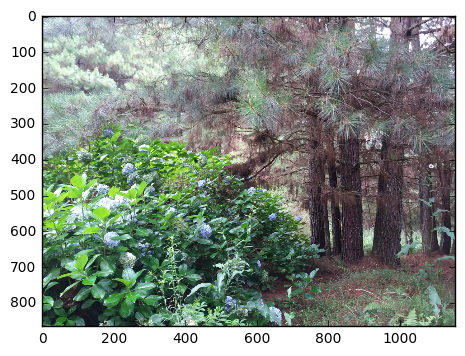

In [19]:
img_visualize = mpimg.imread('./test/1.jpg')
plt.imshow(img_visualize)
plt.show()

#### Save training and test data into a pickle file

In [98]:
%%time
with open('data.pickle','wb') as f:
    cPickle.dump({'x':x, 'y':y, 'test_images':test_images, 'test_names':test_names}, f)

CPU times: user 24.3 s, sys: 5.02 s, total: 29.3 s
Wall time: 29 s


In [5]:
%%time
with open('data.pickle','rb') as f:
    #data = cPickle.load(f)
    data = np.load(f)

CPU times: user 52 s, sys: 960 ms, total: 52.9 s
Wall time: 52.9 s


In [6]:
x = data['x']
y = data['y']

#### Split train and validation data

In [101]:
x_train, x_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.3, random_state=42)
    
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

('x_train', (1606, 224, 224, 3))
('y_train', (1606,))
('x_test', (689, 224, 224, 3))
('y_test', (689,))


In [102]:
%%time
train_RGB_mean = np.array([x[i].mean(axis=(0,1)) for i in xrange(x.shape[0])]).mean(axis=0)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

CPU times: user 2.55 s, sys: 6.47 s, total: 9.02 s
Wall time: 8.9 s


In [103]:
%%time
# normalizing the input image by subtracting overall mean from each pixel for each channel
x_train = np.array([x_train[i] - train_RGB_mean for i in xrange(x_train.shape[0])])
x_test = np.array([x_test[i] - train_RGB_mean for i in xrange(x_test.shape[0])])
x_train = x_train/255.0
x_test = x_test/225.0

CPU times: user 3.12 s, sys: 10.4 s, total: 13.5 s
Wall time: 13.2 s


## Use Keras pre-trained VGG16 without the top three FC layers

In [4]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

Using TensorFlow backend.


In [105]:
img_rows, img_cols, img_channel = 224, 224, 3
base_model = applications.VGG16(weights='imagenet', include_top=False, \
                                input_shape=(img_rows, img_cols, img_channel))

The training is carried out by optimising the multinomial logistic regression objective using mini-batch gradient descent with momentum. 

We intially set the batch seize to 25, momentum to 0.9 and the learning rate to $10^{-2}$ as the author did in the paper [_Very Deep Convlutional Networks For Large-scale Image Recognition_]('https://arxiv.org/pdf/1409.1556.pdf'). 

However, a mini-batch size of 5 works better in our data set and we dropout from two fully-connected layers (the first dropout ratio is 0.5 and second dropout ratio is 0.3) to accelerate the training speed and also reduce the risk of overfitting.

We decreased the learning rate by a factor of 10 if the validation accuracy stopped improving and the parameter was finally tuned to be $10^{-4}$. Also we initally set the epochs to 25 but a larger epochs work better for small batch size so it is finally set to be 50.

In [106]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.5))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.3))
add_model.add(Dense(1, activation='sigmoid'))

model = Model(input=base_model.input, output=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_11 (InputLayer)            (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 224, 224, 64)  1792        input_11[0][0]                   
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 224, 224, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 112, 112, 64)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

For more details about Keras, please go to: https://keras.io/layers/core/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

We run the model 50 times with a batch-size of 5. The results fluctuate a bit at the beginning but it becomes more steady after 40 epochs.

In [ ]:
batch_size = 5
epochs = 50

train_generator = ImageDataGenerator(
#        featurewise_center=True,
#        featurewise_std_normalization=True,
#        rescale=1./255,
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)

#train_generator.fit(x_train)

history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=batch_size),
    samples_per_epoch=x_train.shape[0],  # batch_size, renamed by steps_per_epoch
    nb_epoch=epochs,  # renamed by epochs 
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc', save_best_only=True)]
)


Epoch 1/50
1606/1606 [==============================] - 166s - loss: 0.4888 - acc: 0.7572 - val_loss: 0.2284 - val_acc: 0.8999

In [ ]:
test_images = data['test_images']
test_images = test_images.astype('float32')
test_images = np.array([test_images[i] - train_RGB_mean for i in xrange(test_images.shape[0])])
test_images = test_images/255.0

In [ ]:
# def test_gen(X_test, batch_size):
#     Y_trash = np.ones(X_test.shape[0])
#     flow = train_generator.flow(X_test, Y_trash, batch_size=batch_size)
#     for X,Y in flow:
#         yield X #ignore Y


In [ ]:
predictions = model.predict(test_images)

In [ ]:
# predictions = model.predict_generator(
#     test_gen(test_images, batch_size),
#     val_samples = test_images.shape[0]
# )

In [ ]:
test_names = data['test_names']

sample_submission = pd.read_csv("./sample_submission.csv")

for i, name in enumerate(test_names):
    sample_submission.loc[sample_submission['name'] == name, 'invasive'] = predictions.ravel()[i]

sample_submission.to_csv("submit.csv", index=False)

In [112]:
# save our model if result is positive
model.save('vgg16_24th.h5')

##  Random Forest

Usually, random forest cannot handle image recognition problems because of the huge dimensionality ($224*224*3$ pixels). Besides, the position of pixels play an important role here. The species could appear in different part of the pictures, and the shooting angle and spots are not ordinary perhaps. So, how to establish a design matrix is a tough mission. In this project, we come out one way that extracting design matrix from deep learning. The idea is that we trained our VGG model but return the result of intermediate layer. In this project, we return the last layer before full connected layers, and flattern it as a vector with size 25088. Rnadom forest is used after getting the design matrix.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [8]:
# load the model (trained VGG16)
model=load_model('vgg16_24th.h5')

In [11]:
model_new=Model(input=model.layers[0].input,output=model.layers[-2].output)

In [12]:
# get the design matrix of training image
Result_layer=model_new.predict(x)
design=np.ones([2295,25088])
for i in range(0,2295):
    design[i,:]=Result_layer[i,:,:,:].flatten()

In [13]:
# get the design matrix of test image
Result_layer_te=model_new.predict(test_images)
design_te=np.ones([1531,25088])
for i in range(0,1531):
    design_te[i,:]=Result_layer_te[i,:,:,:].flatten()

In [14]:
# random forest choosing criterion='entropy' and max_features='sqrt'
RF=RandomForestClassifier(n_estimators=1000,oob_score='True',max_features='sqrt',criterion='entropy')
RF.fit(design,y)
# get final predicted probability
predicted_te= RF.predict_proba(design_te)
predicted_te[:,1]

array([ 0.984,  0.003,  0.046, ...,  0.   ,  0.995,  0.987])

It is worth commenting that the design matrix is really sparse. Each row has only 1851 non-zero elements out of 25088. 

# Submission

In [ ]:
test_names = data['test_names']

sample_submission = pd.read_csv("./sample_submission.csv")

for i, name in enumerate(test_names):
    sample_submission.loc[sample_submission['name'] == name, 'invasive'] = predicted_s2[:,1].ravel()[i]

sample_submission.to_csv("submit_svc.csv", index=False)

# Results

Kaggle competition link: https://www.kaggle.com/c/invasive-species-monitoring/leaderboard.
Our final Deep learning model has test accuracy of 0.99020 and ranked at 19 out of 161 teams.
Random Forest gets the accuracy of 0.98595 and ranked at 39 out of 161 teams. We can see tht our random forest can work and did a good job here.
Linear SVM is also trained with tuning parameter C=1 but worse accuracy rate obtained. 

# Future Improvement

* We actually can change the image size and it can contain more information so the result should be improved but need further examination.
* Try other pre-trained DNN
* Try some manully ensemble method such as DL + SVM + Xgboost